# Explore shape distributions

This notebook plots shape metrics to understand the relationships.

In [1]:
import os
import warnings

import geopandas
import dask_geopandas
import numpy
import pandas
import pooch
import pygeos
import osmnx as ox
import esda.shape as shape
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tqdm import tqdm
from shapely.affinity import translate

In [2]:
sample = geopandas.read_parquet("../data/sample.parquet")

In [3]:
all_poly = []
for i, row in sample.iterrows():
    fua = geopandas.read_parquet(f"../data/{int(row.eFUA_ID)}/polygons/")
    fua['continent'] = row.continent
    fua['country'] = row.Cntry_name
    fua['name'] = row.eFUA_name
    fua.crs = None
    all_poly.append(fua)
all_poly_data = pandas.concat(all_poly).reset_index(drop=True)

(-100.0, 20000.0)

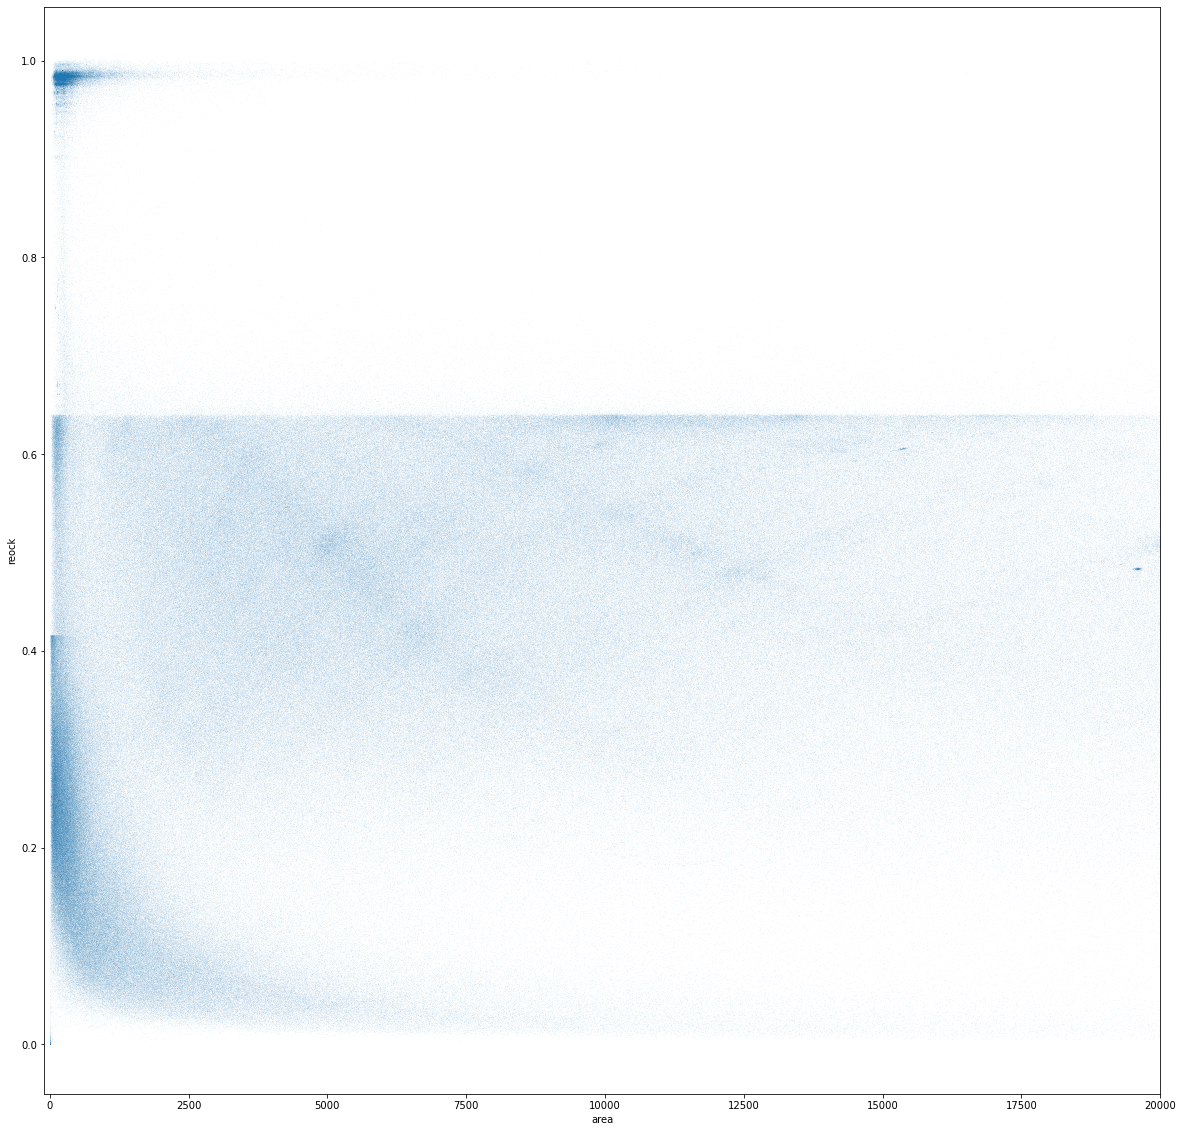

In [4]:
ax = all_poly_data.plot.scatter('area', 'reock', figsize=(20, 20), s=.0001)
ax.set_xlim(-100, 20000)
# ax.set_ylim(0, 2500)

(-100.0, 20000.0)

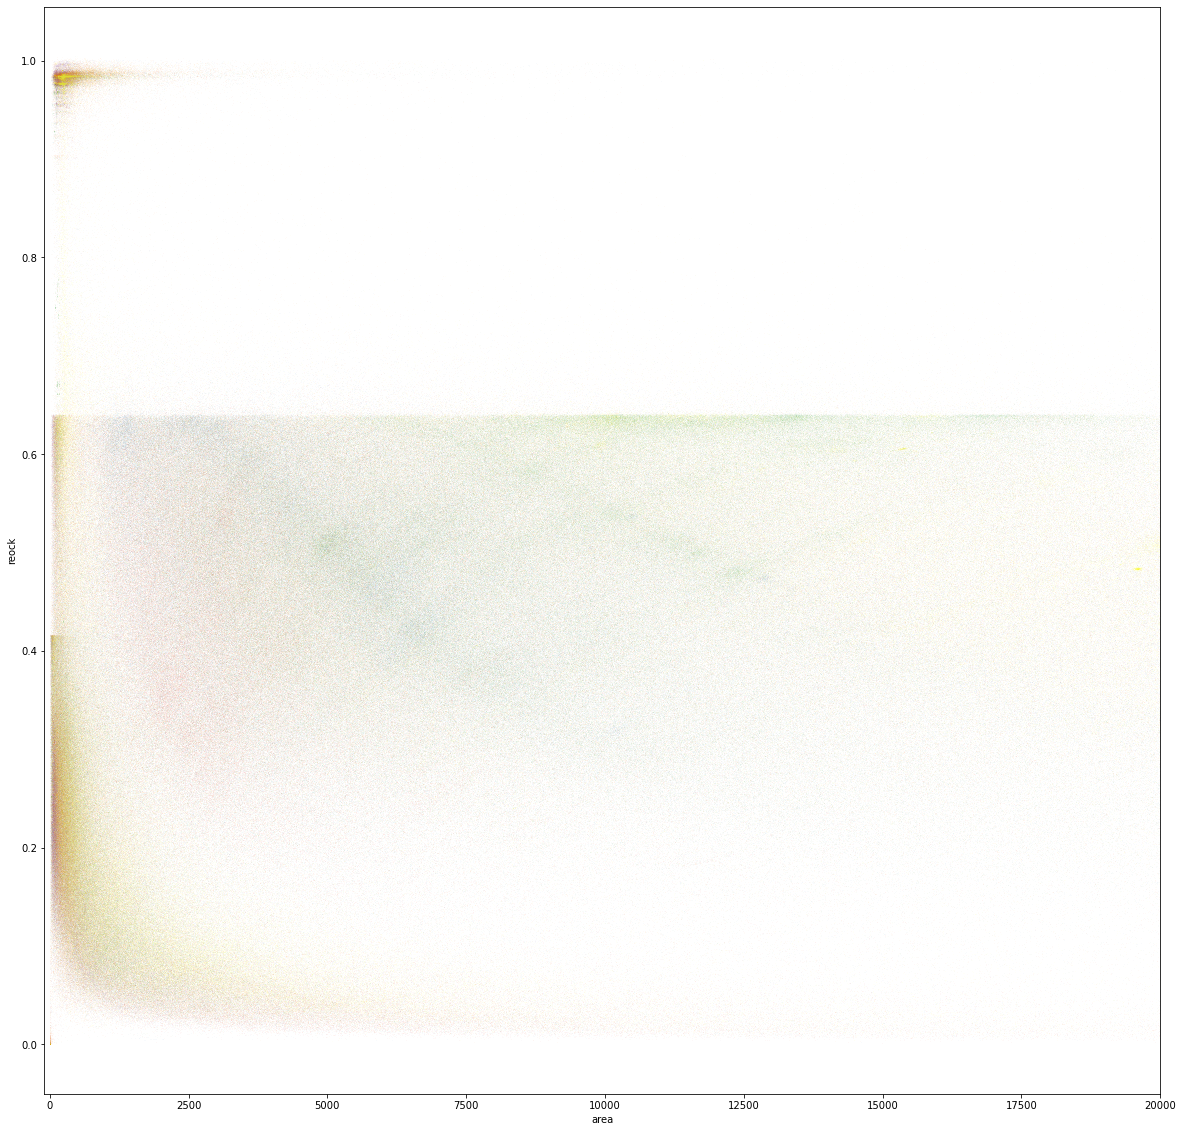

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))
for i, c in enumerate(sample.continent.unique()):
    all_poly_data[all_poly_data.continent == c].plot.scatter('area', 'reock', s=.0001, color=cm.Set1(i), ax=ax)
ax.set_xlim(-100, 20000)
# ax.set_ylim(0, 2500)

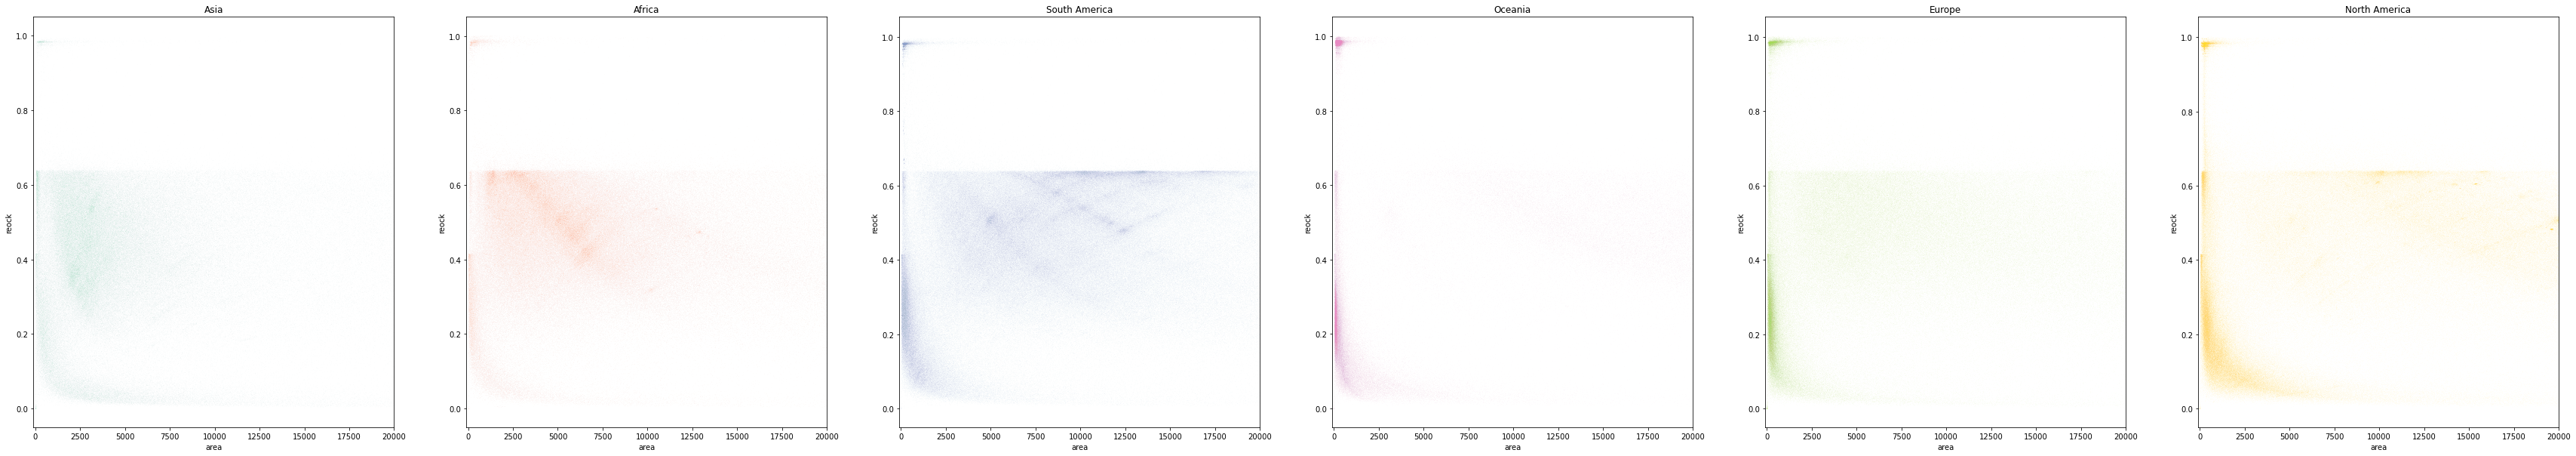

In [6]:
fig, ax = plt.subplots(1, 6, figsize=(60, 10))
for i, c in enumerate(sample.continent.unique()):
    all_poly_data[all_poly_data.continent == c].plot.scatter('area', 'reock', s=.00005, color=cm.Set2(i), ax=ax[i])
    ax[i].set_xlim(-100, 20000)
    ax[i].set_title(c)
# ax.set_ylim(0, 2500)

In [7]:
small_set = all_poly_data.query('area < 20000').sample(10000, random_state=42)

In [8]:
centroid = small_set.centroid
small_set['x'] = centroid.x
small_set['y'] = centroid.y

(-100.0, 20000.0)

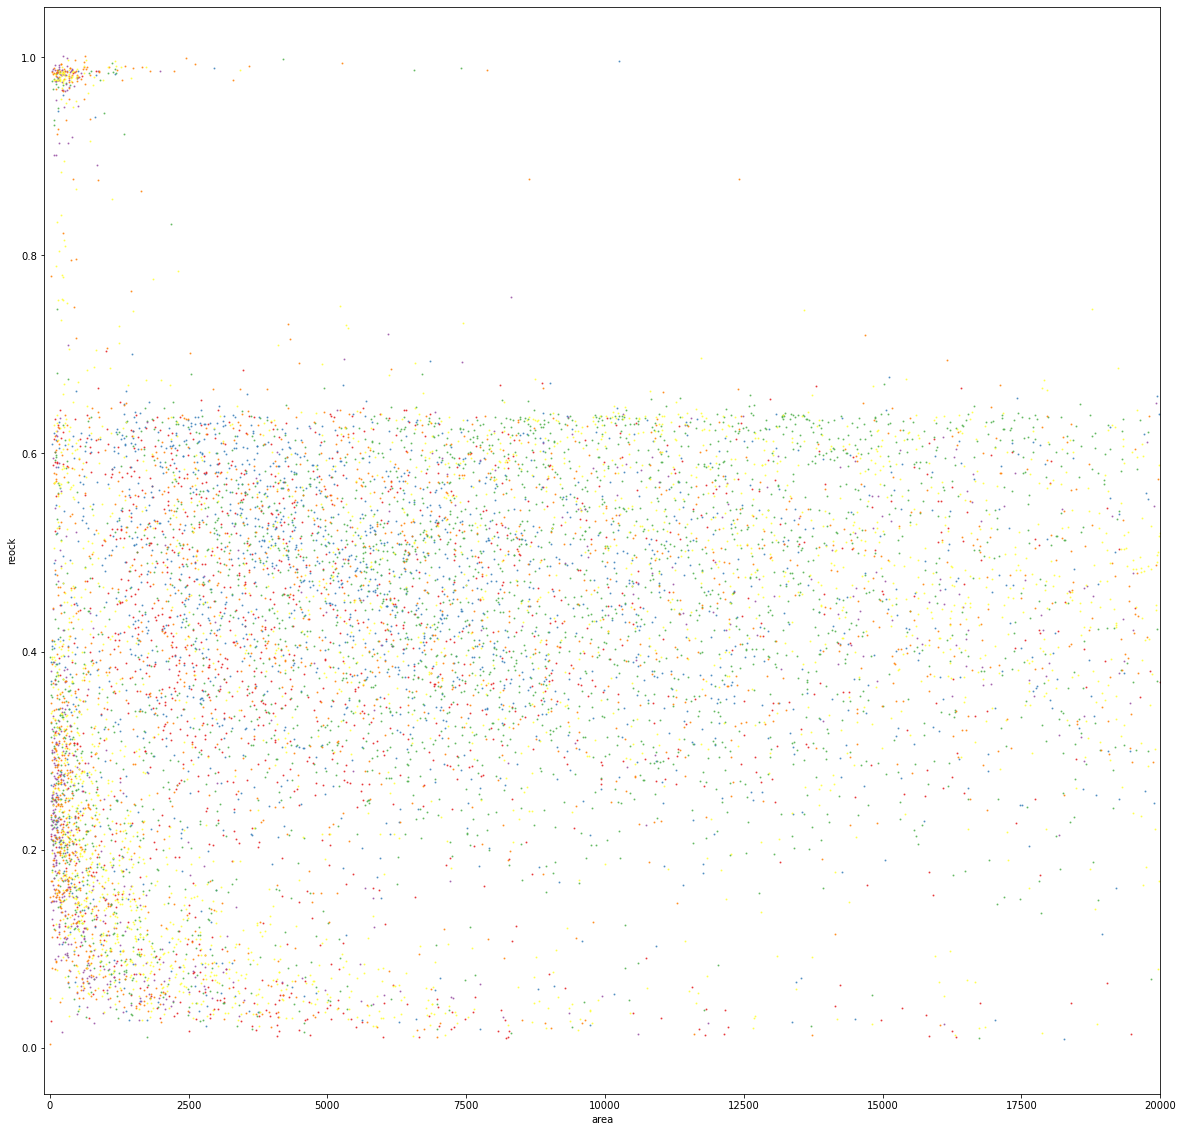

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
for i, c in enumerate(sample.continent.unique()):
    small_set[small_set.continent == c].plot.scatter('area', 'reock', s=1, color=cm.Set1(i), ax=ax, alpha=.7)
ax.set_xlim(-100, 20000)



In [10]:
translated = []
for i, row in small_set.iterrows():
    y = row.reock * 10000
    x = row.area / 2
    g = translate(row.geometry, xoff=-(row.x - x), yoff=-(row.y - y))
    
    translated.append(g)
small_set['translated'] = geopandas.GeoSeries(translated, index=small_set.index)

In [11]:
y = small_set.reock.iloc[0] * 10000
x = small_set.area.iloc[0] / 2
translate(small_set.geometry.iloc[0], xoff=-(small_set.x.iloc[0] - x), yoff=-(small_set.y.iloc[0] - y)).wkt

'POLYGON ((122.988723569666 3703.605466077104, 135.7147284089588 3693.095858555287, 141.7242308687419 3689.132049528882, 143.4503555161646 3683.541990158614, 140.7555682255188 3678.93132879911, 136.7363044797676 3677.444105080329, 132.7790290048579 3677.590054713655, 129.3809472473804 3680.24598842999, 126.6159161529504 3686.101780301891, 122.988723569666 3703.605466077104))'

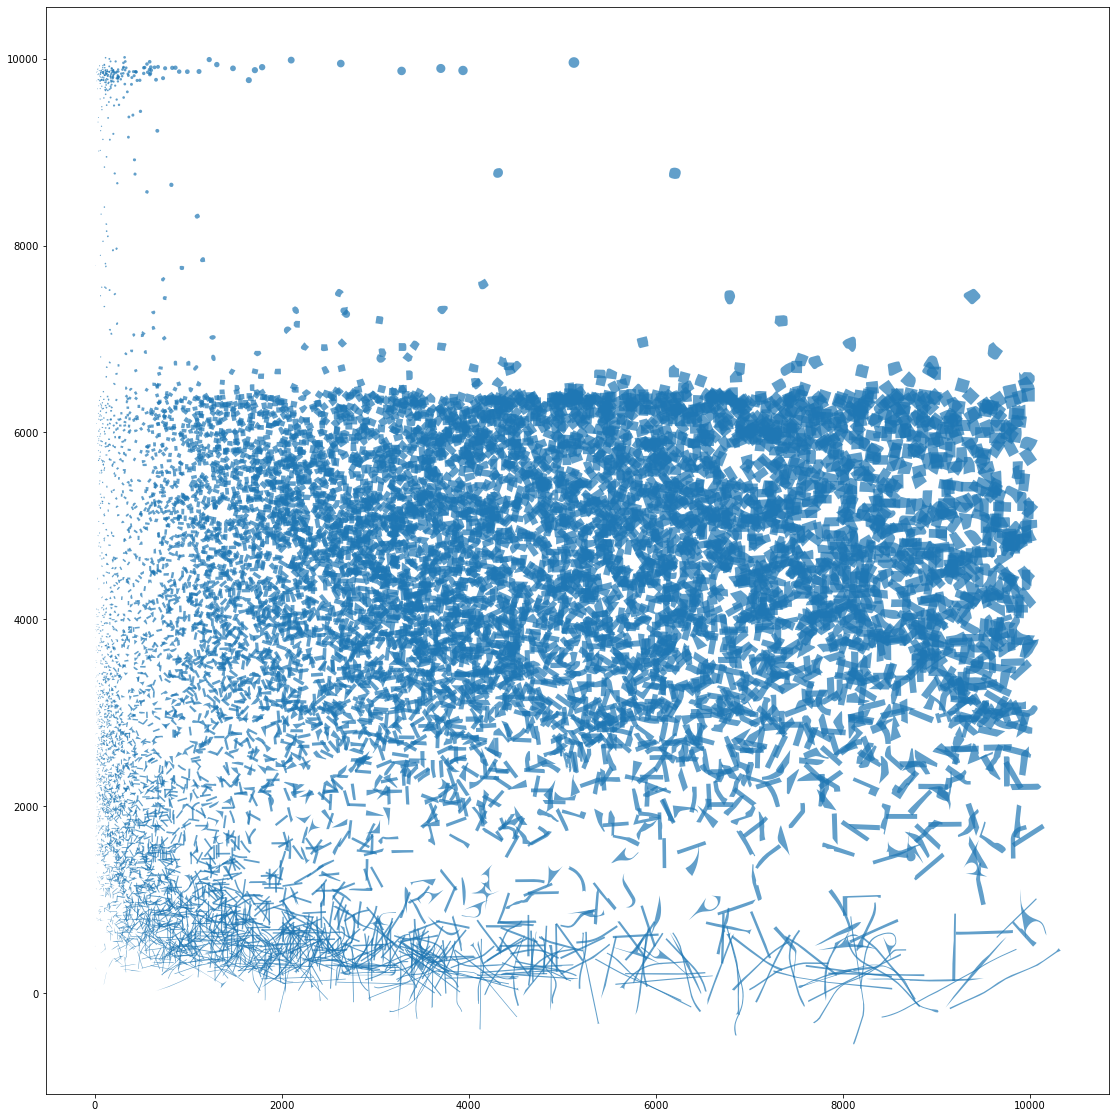

In [12]:
ax = small_set.set_geometry('translated').plot(aspect=1, figsize=(20, 20), alpha=.7)